In [370]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score

df = pd.read_csv('/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Clustering Project/mini-project-III/mini-project-III-data/twm_customer.csv', delimiter=';')
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [371]:
# Check for missing values 
missing_values = df.isna().sum()
missing_values

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [372]:
#check for 0 values
zero_values = (df == 0).sum()
zero_values


cust_id              0
income             102
age                  0
years_with_bank     88
nbr_children       466
gender               0
marital_status       0
name_prefix          0
first_name           0
last_name            0
street_nbr           0
street_name          0
postal_code          0
city_name            0
state_code           0
dtype: int64

In [373]:
df['nbr_children'].value_counts()

0    466
1    114
2    110
3     38
5     10
4      9
Name: nbr_children, dtype: int64

In [374]:
#remove kids as they are not target customers and dont make money
df_no_kids = df[df['age'] >= 18]
df_no_kids

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [375]:
# Group the data by state_code and compute the mean income for each state
state_income = df.groupby('state_code')['income'].transform('mean')
# Add the new column to the DataFrame
df['avg_income_state'] = state_income
# Add new column for the income relative to the average
df['income_relative_to_state'] = df['income'] / df['avg_income_state']
# Group the data by city and compute the mean income for each city
city_income = df.groupby('city_name')['income'].transform('mean')
# Add the new column to the DataFrame
df['avg_income_city'] = city_income
# Add new column for the income relative to the average
df['income_relative_to_city'] = df['income'] / df['avg_income_city']
# Group the data by state_code and compute the mean income for each state
postal_code_income = df.groupby('postal_code')['income'].transform('mean')
# Add the new column to the DataFrame
df['avg_income_postal_code'] = postal_code_income
# Add new column for the income relative to the average
df['income_relative_to_postal_code'] = df['income'] / df['avg_income_postal_code']

In [376]:
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,street_name,postal_code,city_name,state_code,avg_income_state,income_relative_to_state,avg_income_city,income_relative_to_city,avg_income_postal_code,income_relative_to_postal_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,...,Second ...,89194,Las Vegas,NV,14810.500000,1.765639,14810.500000,1.765639,16760.333333,1.560231
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,Daffodil ...,90159,Los Angeles,CA,22741.237288,0.290442,27737.964286,0.238121,9706.666667,0.680460
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,Figueroa ...,90024,Los Angeles,CA,22741.237288,0.815611,27737.964286,0.668686,18548.000000,1.000000
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,...,Humble ...,90172,Los Angeles,CA,22741.237288,2.096104,27737.964286,1.718511,47668.000000,1.000000
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,...,C ...,10138,New York City,NY,23650.906542,1.883818,24621.244898,1.809575,13843.000000,3.218522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,...,B ...,90016,Los Angeles,CA,22741.237288,0.650580,27737.964286,0.533384,14795.000000,1.000000
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,...,Inspiration ...,10126,New York City,NY,23650.906542,1.115687,24621.244898,1.071717,22316.600000,1.182393
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,...,23rd ...,87194,Albuquerque,NM,20394.428571,3.005723,20394.428571,3.005723,21992.500000,2.787314
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,...,H ...,35241,Birmingham,AL,12004.750000,1.257835,12004.750000,1.257835,15100.000000,1.000000


In [377]:
# drop irrelevant columns
df_no_kids = df.drop(columns=['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code','avg_income_state', 'avg_income_city', 'avg_income_postal_code'])
df_no_kids

,income,age,years_with_bank,nbr_children,gender,marital_status,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code
0,26150,46,5,1,M,2,1.765639,1.765639,1.560231
1,6605,71,1,0,M,2,0.290442,0.238121,0.680460
2,18548,38,8,0,F,1,0.815611,0.668686,1.000000
3,47668,54,3,0,F,1,2.096104,1.718511,1.000000
4,44554,59,9,2,F,4,1.883818,1.809575,3.218522
...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,0.650580,0.533384,1.000000
743,26387,56,6,1,M,2,1.115687,1.071717,1.182393
744,61300,50,0,2,M,2,3.005723,3.005723,2.787314
745,15100,37,7,0,F,2,1.257835,1.257835,1.000000


In [378]:
missing_values = df_no_kids.isna().sum()
df_no_kids = df_no_kids.dropna()

In [379]:
# convert gender to 0s and 1s
df_no_kids['gender'] = df_no_kids['gender'].replace({'M ': 0, 'F ': 1})
df_no_kids


/var/folders/2d/bqz04hdj23l8m45654zxfnl80000gn/T/ipykernel_1811/692238088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,income,age,years_with_bank,nbr_children,gender,marital_status,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code
0,26150,46,5,1,0,2,1.765639,1.765639,1.560231
1,6605,71,1,0,0,2,0.290442,0.238121,0.680460
2,18548,38,8,0,1,1,0.815611,0.668686,1.000000
3,47668,54,3,0,1,1,2.096104,1.718511,1.000000
4,44554,59,9,2,1,4,1.883818,1.809575,3.218522
...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,1,4,0.650580,0.533384,1.000000
743,26387,56,6,1,0,2,1.115687,1.071717,1.182393
744,61300,50,0,2,0,2,3.005723,3.005723,2.787314
745,15100,37,7,0,1,2,1.257835,1.257835,1.000000


In [380]:
print(df_no_kids.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'income_relative_to_state', 'income_relative_to_city',
       'income_relative_to_postal_code'],
      dtype='object')


In [381]:
# convert categorical variables to numerical using one-hot encoding
df_no_kids = pd.get_dummies(df_no_kids,columns=['marital_status'])

# scale data - each column separatly as otherwise the income column will dominate the other columns
scaled_cols = scaler.fit_transform(df_no_kids)

# create new dataframe with scaled columns
df_scaled = pd.DataFrame(scaled_cols, columns=df_no_kids.columns)


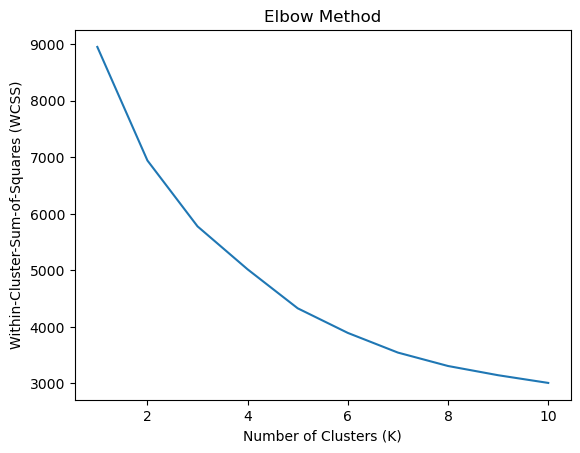

In [382]:
# Initialize an empty list to store the WCSS values for each K
wcss = []

# Fit KMeans algorithm to the data for different values of K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for each K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [383]:
# Use alternative method with silhouette scores to determine optimal number of clusters
# List to store silhouette scores for each k value
silhouette_scores = []

# define range of k values
k_values = range(2, 11)

# Iterate over k values and compute silhouette scores
for i in k_values:
    # Fit KMeans clustering model
    model = KMeans(n_clusters=i, random_state=0, n_init=10)
    model.fit(df_scaled)

    # Compute silhouette score
    labels = model.labels_
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    
#np.unique(labels)

    


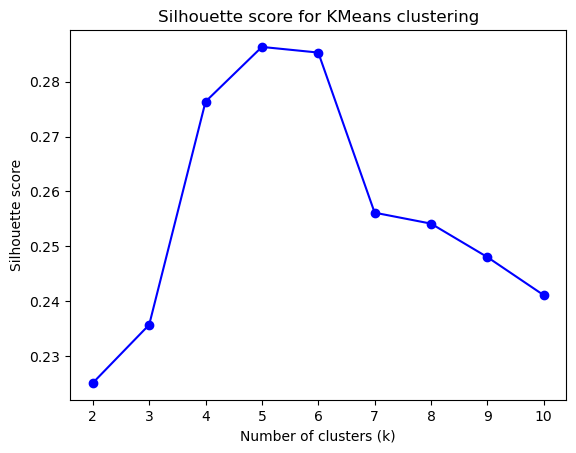

In [384]:
# Plot elbow curve
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for KMeans clustering')
plt.show()

In [385]:
# Apply clustering algorithm with the optimal number of clusters
n_clusters = 5 # Example value obtained from the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df_scaled)

# Assign cluster labels to the original dataframe
df_no_kids['cluster'] = kmeans.labels_

# Get the cluster labels
labels = df_no_kids['cluster']

# Add cluster labels to the scaled dataframe
df_scaled['cluster'] = labels


/Users/magnesium/opt/anaconda3/envs/lighthouse_labs_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



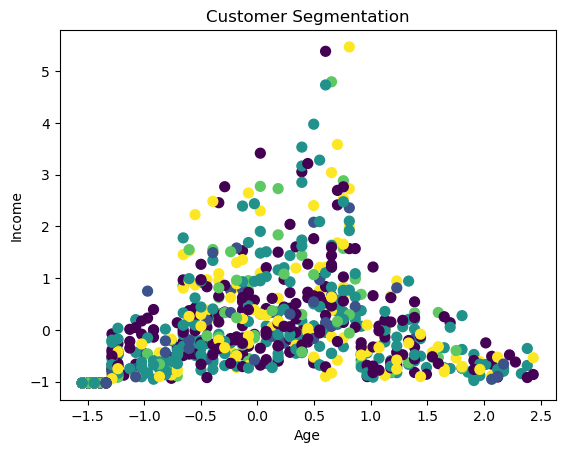

In [386]:
plt.scatter(df_scaled['age'], df_scaled['income'], c=df_scaled['cluster'], s=50)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [387]:
df_scaled

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,0.152817,0.182567,0.407132,0.257622,-1.125823,0.817638,0.843310,0.820849,-0.764110,1.055137,-0.262236,-0.321792,4.0
1,-0.727922,1.492137,-1.089027,-0.648915,-1.125823,-0.760511,-0.842119,-0.468189,-0.764110,1.055137,-0.262236,-0.321792,2.0
2,-0.189745,-0.236495,1.529251,-0.648915,0.888239,-0.198691,-0.367043,0.000000,1.308712,-0.947744,-0.262236,-0.321792,0.0
3,1.122463,0.601630,-0.340948,-0.648915,0.888239,1.171165,0.791310,0.000000,1.308712,-0.947744,-0.262236,-0.321792,4.0
4,0.982140,0.863543,1.903291,1.164159,0.888239,0.944064,0.891789,3.250571,-0.764110,-0.947744,-0.262236,3.107594,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,-0.358863,-0.341260,0.781172,0.257622,0.888239,-0.375239,-0.516332,0.000000,-0.764110,-0.947744,-0.262236,3.107594,0.0
742,0.163497,0.706395,0.781172,0.257622,-1.125823,0.122326,0.077652,0.267242,-0.764110,1.055137,-0.262236,-0.321792,3.0
743,1.736749,0.392098,-1.463067,1.164159,-1.125823,2.144264,2.211591,2.618766,-0.764110,1.055137,-0.262236,-0.321792,2.0
744,-0.345119,-0.288878,1.155211,-0.648915,0.888239,0.274395,0.283011,0.000000,-0.764110,1.055137,-0.262236,-0.321792,4.0


In [388]:
cluster_summary = df_no_kids.groupby('cluster').mean()
print(cluster_summary.columns)
print(df_no_kids.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'income_relative_to_state', 'income_relative_to_city',
       'income_relative_to_postal_code', 'marital_status_1',
       'marital_status_2', 'marital_status_3', 'marital_status_4'],
      dtype='object')
Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'income_relative_to_state', 'income_relative_to_city',
       'income_relative_to_postal_code', 'marital_status_1',
       'marital_status_2', 'marital_status_3', 'marital_status_4', 'cluster'],
      dtype='object')


In [389]:
df_no_kids

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,26150,46,5,1,0,1.765639,1.765639,1.560231,0,1,0,0,4
1,6605,71,1,0,0,0.290442,0.238121,0.680460,0,1,0,0,2
2,18548,38,8,0,1,0.815611,0.668686,1.000000,1,0,0,0,0
3,47668,54,3,0,1,2.096104,1.718511,1.000000,1,0,0,0,4
4,44554,59,9,2,1,1.883818,1.809575,3.218522,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,1,0.650580,0.533384,1.000000,0,0,0,1,3
743,26387,56,6,1,0,1.115687,1.071717,1.182393,0,1,0,0,2
744,61300,50,0,2,0,3.005723,3.005723,2.787314,0,1,0,0,4
745,15100,37,7,0,1,1.257835,1.257835,1.000000,0,1,0,0,2


In [390]:
scaled_df = pd.DataFrame(data=df_scaled, columns=df_no_kids.columns)
scaled_df

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,0.152817,0.182567,0.407132,0.257622,-1.125823,0.817638,0.843310,0.820849,-0.764110,1.055137,-0.262236,-0.321792,4.0
1,-0.727922,1.492137,-1.089027,-0.648915,-1.125823,-0.760511,-0.842119,-0.468189,-0.764110,1.055137,-0.262236,-0.321792,2.0
2,-0.189745,-0.236495,1.529251,-0.648915,0.888239,-0.198691,-0.367043,0.000000,1.308712,-0.947744,-0.262236,-0.321792,0.0
3,1.122463,0.601630,-0.340948,-0.648915,0.888239,1.171165,0.791310,0.000000,1.308712,-0.947744,-0.262236,-0.321792,4.0
4,0.982140,0.863543,1.903291,1.164159,0.888239,0.944064,0.891789,3.250571,-0.764110,-0.947744,-0.262236,3.107594,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,-0.358863,-0.341260,0.781172,0.257622,0.888239,-0.375239,-0.516332,0.000000,-0.764110,-0.947744,-0.262236,3.107594,0.0
742,0.163497,0.706395,0.781172,0.257622,-1.125823,0.122326,0.077652,0.267242,-0.764110,1.055137,-0.262236,-0.321792,3.0
743,1.736749,0.392098,-1.463067,1.164159,-1.125823,2.144264,2.211591,2.618766,-0.764110,1.055137,-0.262236,-0.321792,2.0
744,-0.345119,-0.288878,1.155211,-0.648915,0.888239,0.274395,0.283011,0.000000,-0.764110,1.055137,-0.262236,-0.321792,4.0


In [391]:
# Aggregate data by cluster
cluster_data = scaled_df.groupby('cluster').mean()

In [392]:
cluster_data

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4
cluster,,,,,,,,,,,,
0.0,-0.042070,-0.065518,-0.023762,-0.141254,-0.006004,-0.057202,-0.065607,-0.096172,0.197679,-0.106534,-0.082910,-0.074876
1.0,-0.016568,-0.025872,-0.037040,0.106532,0.174926,0.057644,0.039552,0.155502,-0.116353,-0.280117,0.756661,0.035435
2.0,-0.085255,0.036105,0.006161,0.079941,0.002052,-0.081212,-0.061738,-0.032010,-0.125681,0.221939,-0.066608,-0.116029
3.0,0.170976,-0.064710,0.027591,0.337610,-0.089173,0.137946,0.117580,0.325702,-0.123974,-0.064120,-0.082431,0.384258
4.0,0.161083,0.094451,0.021494,-0.100777,-0.001695,0.172299,0.165771,0.011010,-0.024964,-0.093802,0.053701,0.156727


In [393]:
import plotly.graph_objects as go

# Define theta
theta = cluster_data.columns  # names of features or variables

fig = go.Figure()

# Loop over each cluster
for i in range(5):
    # Select feature values for records in cluster i
    r = cluster_data.loc[i].values

    # Add trace to radar chart
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True
        )),
    showlegend=True
)

fig.show()


In [394]:
df_scaled

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,0.152817,0.182567,0.407132,0.257622,-1.125823,0.817638,0.843310,0.820849,-0.764110,1.055137,-0.262236,-0.321792,4.0
1,-0.727922,1.492137,-1.089027,-0.648915,-1.125823,-0.760511,-0.842119,-0.468189,-0.764110,1.055137,-0.262236,-0.321792,2.0
2,-0.189745,-0.236495,1.529251,-0.648915,0.888239,-0.198691,-0.367043,0.000000,1.308712,-0.947744,-0.262236,-0.321792,0.0
3,1.122463,0.601630,-0.340948,-0.648915,0.888239,1.171165,0.791310,0.000000,1.308712,-0.947744,-0.262236,-0.321792,4.0
4,0.982140,0.863543,1.903291,1.164159,0.888239,0.944064,0.891789,3.250571,-0.764110,-0.947744,-0.262236,3.107594,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,-0.358863,-0.341260,0.781172,0.257622,0.888239,-0.375239,-0.516332,0.000000,-0.764110,-0.947744,-0.262236,3.107594,0.0
742,0.163497,0.706395,0.781172,0.257622,-1.125823,0.122326,0.077652,0.267242,-0.764110,1.055137,-0.262236,-0.321792,3.0
743,1.736749,0.392098,-1.463067,1.164159,-1.125823,2.144264,2.211591,2.618766,-0.764110,1.055137,-0.262236,-0.321792,2.0
744,-0.345119,-0.288878,1.155211,-0.648915,0.888239,0.274395,0.283011,0.000000,-0.764110,1.055137,-0.262236,-0.321792,4.0


In [395]:
# find rows with NaN values in the "cluster" column
nan_rows = df_scaled[df_scaled['cluster'].isna()]
print(nan_rows)

# drop rows with NaN values in the "cluster" column
df_scaled = df_scaled.dropna(subset=['cluster'])


       income       age  years_with_bank  nbr_children    gender  \
129  0.220365  0.811161         1.529251      0.257622 -1.125823   

     income_relative_to_state  income_relative_to_city  \
129                  0.229436                 0.557702   

     income_relative_to_postal_code  marital_status_1  marital_status_2  \
129                        1.013413          -0.76411          1.055137   

     marital_status_3  marital_status_4  cluster  
129         -0.262236         -0.321792      NaN  


In [396]:
# re-lable df_scaled now we droped the Nan rows
labels = df_scaled['cluster']

In [397]:
# Perform PCA on the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

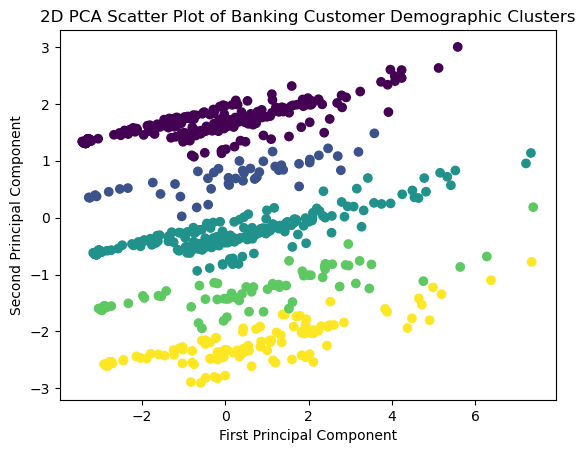

In [398]:
# Plot the 2D scatter plot
scatter_plot = plt.figure()
plt.scatter(principal_components[:,0], principal_components[:,1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Scatter Plot of Banking Customer Demographic Clusters')
plt.show()

In [399]:
df_scaled[df_scaled['cluster'] == 1].describe()

,income,age,years_with_bank,nbr_children,gender,income_relative_to_state,income_relative_to_city,income_relative_to_postal_code,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,-0.016568,-0.025872,-0.037040,0.106532,0.174926,0.057644,0.039552,0.155502,-0.116353,-0.280117,0.756661,0.035435,1.0
std,0.824820,0.971765,0.934403,1.012820,0.973439,0.855973,0.871702,1.001187,0.970946,0.954159,1.783458,1.058683,0.0
min,-1.025557,-1.441299,-1.463067,-0.648915,-1.125823,-1.071222,-1.104857,-1.465196,-0.764110,-0.947744,-0.262236,-0.321792,1.0
25%,-0.669949,-0.851992,-0.714988,-0.648915,-1.125823,-0.610034,-0.667920,0.000000,-0.764110,-0.947744,-0.262236,-0.321792,1.0
50%,-0.169850,-0.026964,-0.153928,-0.648915,0.888239,-0.034313,-0.134060,0.000000,-0.764110,-0.947744,-0.262236,-0.321792,1.0
75%,0.452784,0.614725,0.500642,1.164159,0.888239,0.583045,0.658102,0.968507,1.308712,1.055137,0.756661,-0.321792,1.0
max,2.359552,2.173113,1.903291,3.883769,0.888239,2.187558,1.982657,2.930393,1.308712,1.055137,3.813354,3.107594,1.0
